**Importing Libraries and Downloading NLTK Resources**


In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Loading the Data**

In [11]:
data = pd.read_csv('/content/Blank Quiz (Responses) - Form Responses 1.csv', header=None)
data.columns = ['Timestamp', 'Score', 'Feeling', 'DaylightRoom', 'ArtificialLightingRoom', 'DaylightDesk', 'ArtificialLightingDesk']
print(data)

              Timestamp  Score                      Feeling  \
0             Timestamp  Score  Are you feeling good today?   
1     1/19/2024 8:55:05    NaN                        Agree   
2    1/20/2024 14:51:04    NaN               Strongly Agree   
3     1/25/2024 9:21:32    NaN               Strongly Agree   
4     1/25/2024 9:21:51    NaN                      Neutral   
..                  ...    ...                          ...   
231    02-04-2024 14:30    NaN               Strongly Agree   
232    02-04-2024 14:32    NaN            Strongly Disagree   
233    02-06-2024 06:32    NaN                        Agree   
234    02-06-2024 12:15    NaN               Strongly Agree   
235    02-12-2024 12:01    NaN                        Agree   

                                          DaylightRoom  \
0    How satisfied are you with the daylight in the...   
1                                                Agree   
2                                              Neutral   
3          

**Text Preprocessing**

In [12]:

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    words = word_tokenize(str(text).lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data['Feeling'] = data['Feeling'].apply(preprocess_text)
data['DaylightRoom'] = data['DaylightRoom'].apply(preprocess_text)
data['ArtificialLightingRoom'] = data['ArtificialLightingRoom'].apply(preprocess_text)
data['DaylightDesk'] = data['DaylightDesk'].apply(preprocess_text)
data['ArtificialLightingDesk'] = data['ArtificialLightingDesk'].apply(preprocess_text)


**Sentiment Analysis**

In [13]:
sid = SentimentIntensityAnalyzer()
def sentiment_score(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

data['Feeling_sentiment'] = data['Feeling'].apply(sentiment_score)
data['DaylightRoom_sentiment'] = data['DaylightRoom'].apply(sentiment_score)
data['ArtificialLightingRoom_sentiment'] = data['ArtificialLightingRoom'].apply(sentiment_score)
data['DaylightDesk_sentiment'] = data['DaylightDesk'].apply(sentiment_score)
data['ArtificialLightingDesk_sentiment'] = data['ArtificialLightingDesk'].apply(sentiment_score)


 Average Sentiment Score

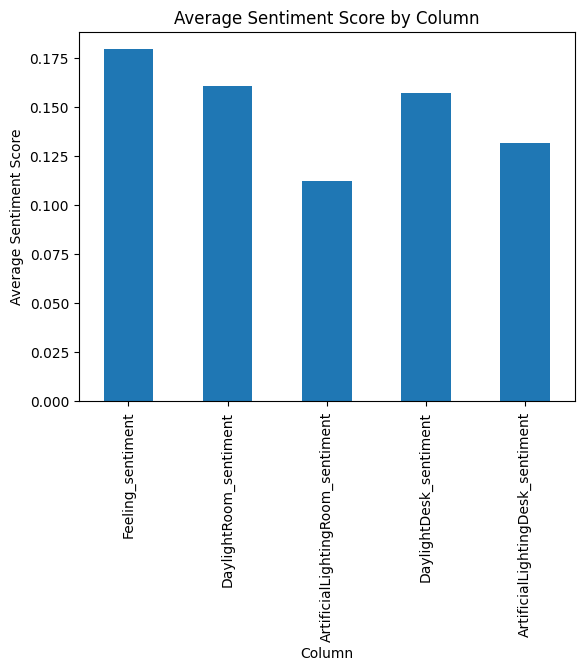

In [14]:
# Calculate the average sentiment score for each column
avg_sentiment = data[['Feeling_sentiment', 'DaylightRoom_sentiment', 'ArtificialLightingRoom_sentiment', 'DaylightDesk_sentiment', 'ArtificialLightingDesk_sentiment']].mean(numeric_only=True)

# Plot the average sentiment score for each column
avg_sentiment.plot(kind='bar')
plt.title('Average Sentiment Score by Column')
plt.xlabel('Column')
plt.ylabel('Average Sentiment Score')
plt.show()


**Sentiment Counts**

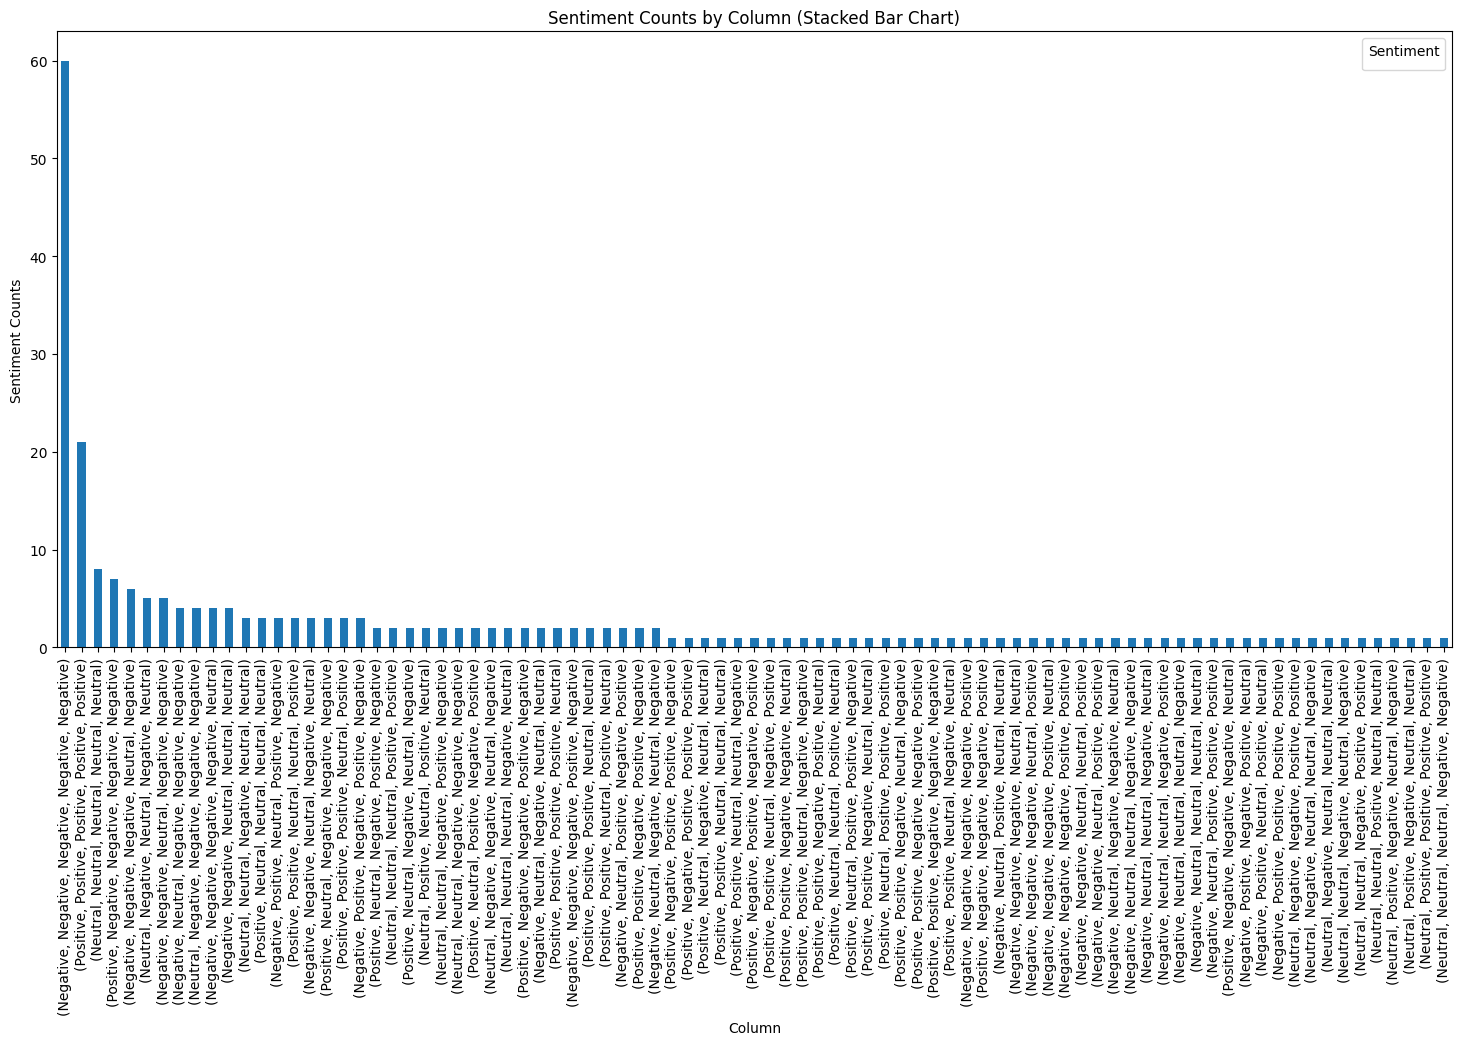

In [20]:
plt.figure(figsize=(18, 8))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Counts by Column (Stacked Bar Chart)')
plt.xlabel('Column')
plt.ylabel('Sentiment Counts')
plt.legend(title='Sentiment')
plt.show()


**Correlation matrix**

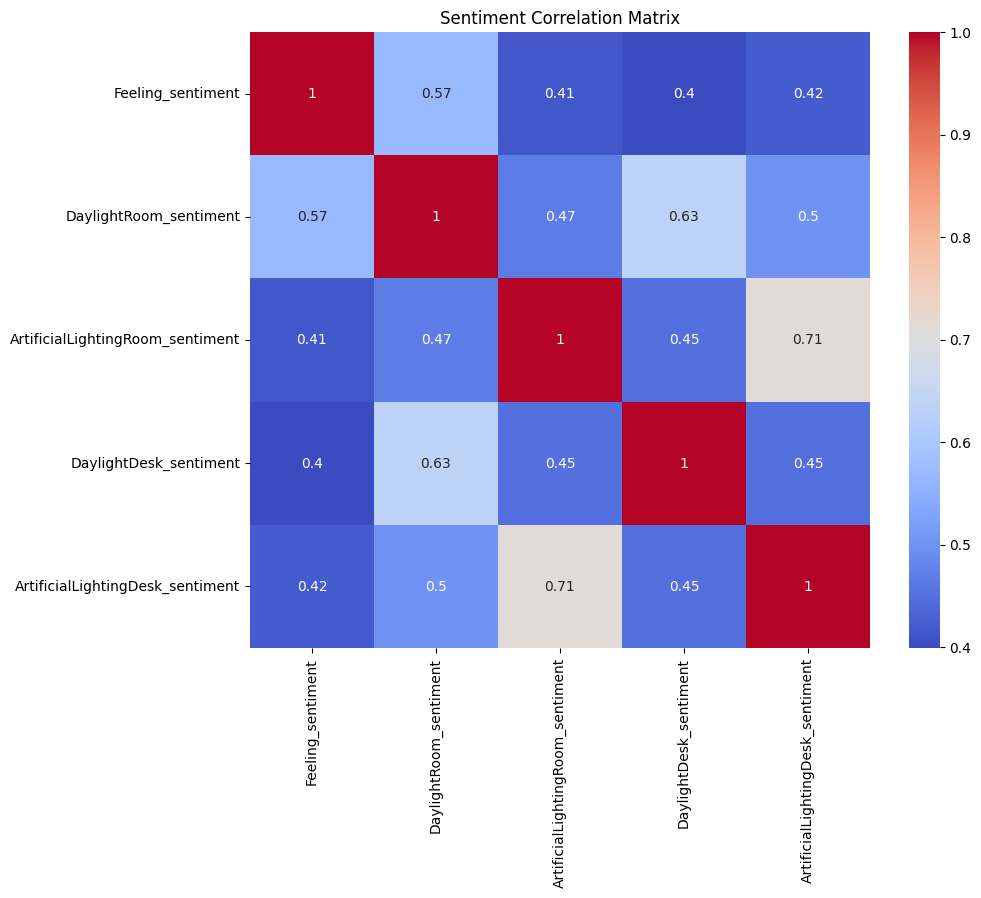

In [16]:

corr_matrix = data[['Feeling_sentiment', 'DaylightRoom_sentiment', 'ArtificialLightingRoom_sentiment', 'DaylightDesk_sentiment', 'ArtificialLightingDesk_sentiment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sentiment Correlation Matrix')
plt.show()


In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from transformers import pipeline

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the data
data = pd.read_csv('/content/Blank Quiz (Responses) - Form Responses 1.csv', header=None)
data.columns = ['Timestamp', 'Score', 'Feeling', 'DaylightRoom', 'ArtificialLightingRoom', 'DaylightDesk', 'ArtificialLightingDesk']

# Initialize the Lemmatizer and define stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define function for text preprocessing
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    words = word_tokenize(str(text).lower())  # Convert to string before lowercasing
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Preprocess the text data
data['Feeling'] = data['Feeling'].apply(preprocess_text)
data['DaylightRoom'] = data['DaylightRoom'].apply(preprocess_text)
data['ArtificialLightingRoom'] = data['ArtificialLightingRoom'].apply(preprocess_text)
data['DaylightDesk'] = data['DaylightDesk'].apply(preprocess_text)
data['ArtificialLightingDesk'] = data['ArtificialLightingDesk'].apply(preprocess_text)

# Initialize RoBERTa for sentiment analysis
classifier = pipeline("sentiment-analysis", model="roberta-base")

# Define function to classify sentiment using RoBERTa
def classify_sentiment(text):
    result = classifier(text)[0]
    label = result['label']
    if label == 'LABEL_1':
        return 'Positive'
    elif label == 'LABEL_2':
        return 'Negative'
    else:
        return 'Neutral'

# Apply RoBERTa sentiment classification to each text column
data['Feeling_sentiment'] = data['Feeling'].apply(classify_sentiment)
data['DaylightRoom_sentiment'] = data['DaylightRoom'].apply(classify_sentiment)
data['ArtificialLightingRoom_sentiment'] = data['ArtificialLightingRoom'].apply(classify_sentiment)
data['DaylightDesk_sentiment'] = data['DaylightDesk'].apply(classify_sentiment)
data['ArtificialLightingDesk_sentiment'] = data['ArtificialLightingDesk'].apply(classify_sentiment)

# Print the first 5 rows of the preprocessed data with sentiment analysis
print(data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

            Timestamp  Score             Feeling             DaylightRoom  \
0           Timestamp  Score  feeling good today  satisfied daylight room   
1   1/19/2024 8:55:05    NaN               agree                    agree   
2  1/20/2024 14:51:04    NaN      strongly agree                  neutral   
3   1/25/2024 9:21:32    NaN      strongly agree                 disagree   
4   1/25/2024 9:21:51    NaN             neutral                  neutral   

               ArtificialLightingRoom             DaylightDesk  \
0  satisfied artificial lighting room  satisfied daylight desk   
1                            disagree        strongly disagree   
2                      strongly agree           strongly agree   
3                            disagree                 disagree   
4                            disagree                    agree   

               ArtificialLightingDesk Feeling_sentiment  \
0  satisfied artificial lighting desk          Positive   
1                     